In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Downloads/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df = df.drop(["Position"],axis=1)
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [4]:
x = df.drop(["Salary"],axis=1)
x.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [5]:
y = df["Salary"]
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
model.fit(x_train,y_train)

LinearRegression()

In [11]:
model.coef_

array([116507.17703349])

In [12]:
model.intercept_

-426794.25837320584

In [13]:
y_train_prdt = model.predict(x_train)

In [14]:
y_test_prdt = model.predict(x_test)

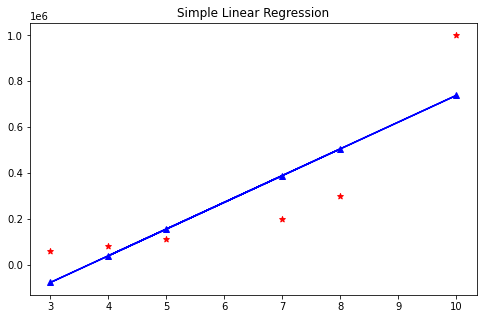

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(x_train,y_train,c='r',marker='*')
plt.plot(x_train,y_train_prdt,c='b',marker='^')
plt.title('Simple Linear Regression')
plt.show()

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_train,y_train_prdt)*100

73.68509287461495

In [18]:
r2_score(y_test,y_test_prdt)*100

-55.80551383902068

In [19]:
# This Simple Linear model is not fitted for this data set
# let's try with ploynomial Refression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(degree=2)

In [22]:
x_train  = poly.fit_transform(x_train)

In [23]:
x_test  = poly.fit_transform(x_test)

In [24]:
x_train

array([[  1.,   8.,  64.],
       [  1.,   3.,   9.],
       [  1.,  10., 100.],
       [  1.,   5.,  25.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.]])

In [25]:
x_test

array([[ 1.,  9., 81.],
       [ 1.,  2.,  4.],
       [ 1.,  6., 36.],
       [ 1.,  1.,  1.]])

In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
model.intercept_


736727.2727272776

In [28]:
model.coef_

array([      0.        , -303939.39393939,   32606.06060606])

In [29]:
y_train_prdt_poly = model.predict(x_train)

In [30]:
a=  pd.DataFrame({'Actual':y_train,'Predict':y_train_prdt_poly})
a

,Actual,Predict
7,300000,392000.000000
2,60000,118363.636364
9,1000000,957939.393939
4,110000,32181.818182
3,80000,42666.666667
6,200000,206848.484848


In [31]:
y_test_prdt_poly = model.predict(x_test)

In [32]:
b =  pd.DataFrame({'Actual':y_test,'Predict':y_test_prdt_poly})
b

,Actual,Predict
8,500000,642363.636364
1,50000,259272.727273
5,150000,86909.090909
0,45000,465393.939394


In [33]:
r2_score(y_train,y_train_prdt_poly)*100

96.70620125569347

In [34]:
r2_score(y_test,y_test_prdt_poly)*100

-77.02771336829161

In [35]:
# over Fitting problem ---> Good in Test Data and Bad in Test Data ( Low Bais and High Varaince)